In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('E:\github\ML-ProjectKart\Customer Income Segmentation Analysis\Dataset\Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
# check if any null values are present
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

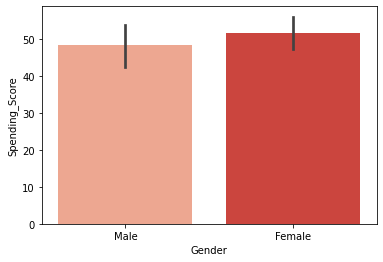

In [18]:
sns.barplot(x = 'Gender',
            y = 'Spending_Score',
            data = data,
            palette = "Reds")
 

plt.show()

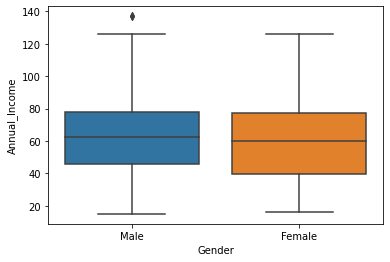

In [20]:
sns.boxplot(x = 'Gender', y = 'Annual_Income', data = data)
plt.show()

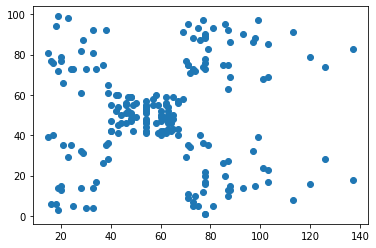

In [6]:
# scatter plot
plt.scatter(data['Annual_Income'],data['Spending_Score'])
plt.show()

In [7]:
# features
features = data[['Annual_Income','Spending_Score']]


In [8]:
# new_features
scaler = MinMaxScaler()
new_features = scaler.fit_transform(features)

In [9]:
print(features.head())
print(pd.DataFrame(new_features).head())

   Annual_Income  Spending_Score
0             15              39
1             15              81
2             16               6
3             16              77
4             17              40
          0         1
0  0.000000  0.387755
1  0.000000  0.816327
2  0.008197  0.051020
3  0.008197  0.775510
4  0.016393  0.397959


In [10]:
# model
N = 5
m1 = KMeans(n_clusters = N)
result = m1.fit_predict(features)
data['cluster'] = result
print(data)
target= data['cluster']

     CustomerID  Gender  Age  Annual_Income  Spending_Score  cluster
0             1    Male   19             15              39        3
1             2    Male   21             15              81        0
2             3  Female   20             16               6        3
3             4  Female   23             16              77        0
4             5  Female   31             17              40        3
..          ...     ...  ...            ...             ...      ...
195         196  Female   35            120              79        2
196         197  Female   45            126              28        4
197         198    Male   32            126              74        2
198         199    Male   32            137              18        4
199         200    Male   30            137              83        2

[200 rows x 6 columns]


Text(0.5, 1.0, 'Final Clusters')

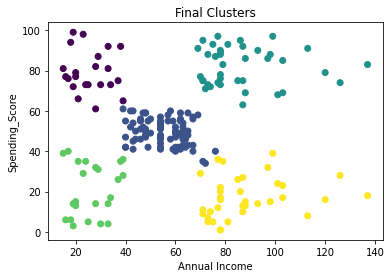

In [12]:
# final scatter
plt.scatter(data['Annual_Income'],data['Spending_Score'],c=data['cluster'])
plt.xlabel("Annual Income")
plt.ylabel("Spending_Score")
plt.title("Final Clusters")

In [13]:
# centroids
cr = m1.cluster_centers_
print(cr)

cdf = pd.DataFrame(cr)
print(cdf)


[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]
           0          1
0  25.727273  79.363636
1  55.296296  49.518519
2  86.538462  82.128205
3  26.304348  20.913043
4  88.200000  17.114286


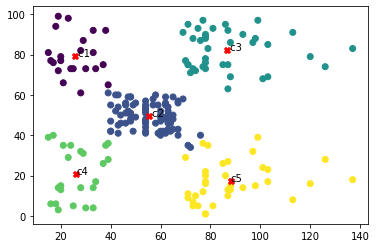

In [14]:
xlist = cdf[0].tolist()
ylist = cdf[1].tolist()
plt.scatter(data['Annual_Income'],data['Spending_Score'],c=data['cluster'])
plt.scatter(xlist, ylist, color='red',marker="X")

num = [' c1',' c2',' c3','c4','c5']
for i ,txt in enumerate(num):
	plt.annotate(txt,(xlist[i],ylist[i]))

plt.show()

In [63]:
data.head(1)

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster
0,1,Male,19,15,39,4


In [65]:
# prediction ON KNOWN DATA
ai = float(input("Enter annual income: "))  #15
ss = float(input("Enter spending score: ")) #39
d = [[ai,ss]]
dt = scaler.transform(d)
print("Cluster: ",m1.predict(dt))

Cluster:  [4]


In [22]:
x_train, x_test, y_train, y_test = train_test_split(new_features,target,random_state=12)

In [23]:
model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
cr = classification_report(y_test,y_pred)
print('-------------------CLASSIFICATION REPORT---------------------')
print(cr)
print("training score: ",model.score(x_train,y_train))
print("testing score: ",model.score(x_test,y_test))


-------------------CLASSIFICATION REPORT---------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.53      1.00      0.69        17
           2       1.00      0.67      0.80        12
           3       1.00      0.60      0.75         5
           4       1.00      1.00      1.00         7

    accuracy                           0.70        50
   macro avg       0.71      0.65      0.65        50
weighted avg       0.66      0.70      0.64        50

training score:  0.7933333333333333
testing score:  0.7


C:\Users\Dilrose\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dilrose\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dilrose\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [24]:
# predictions on known using Logistic Regression
ai = float(input("Enter annual income: "))  #15
ss = float(input("Enter spending score: ")) #39
d = [[ai,ss]]
dt = scaler.transform(d)
print("Cluster: ",model.predict(dt))

Cluster:  [1]


In [61]:
# model and fit
m2 = BernoulliNB()
m2.fit(x_train,y_train)

# cr
y_pred = m2.predict(x_test)
cr = classification_report(y_test,y_pred)
print('-------------------CLASSIFICATION REPORT---------------------')
print(cr)

-------------------CLASSIFICATION REPORT---------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.35      1.00      0.52        17
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         5

    accuracy                           0.34        50
   macro avg       0.07      0.20      0.10        50
weighted avg       0.12      0.34      0.18        50



C:\Users\Dilrose\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dilrose\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dilrose\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera